<a href="https://colab.research.google.com/github/Raji-Siva/ARL-Project/blob/master/MobilenetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd /content/gdrive/My\ Drive/

/content/gdrive/My Drive


In [0]:
!pwd

In [0]:
!pip uninstall tensorflow

In [0]:
!pip install tensorflow==1.14.

In [0]:
import tensorflow as tf
print(tf.__version__)

In [0]:
import numpy as np # linear algebra
import pandas as pd
from __future__ import absolute_import, division, print_function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob, os, random
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
base_path = '/content/gdrive/My Drive/Garbage classification/Garbage classification'
img_list = img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))
'''
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img, dtype=np.uint8)
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())
'''

'\nfor i, img_path in enumerate(random.sample(img_list, 6)):\n    img = image.load_img(img_path, target_size=(224, 224))\n    img = image.img_to_array(img, dtype=np.uint8)\n    plt.subplot(2, 3, i+1)\n    plt.imshow(img.squeeze())\n'

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [0]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((16, 224, 224, 3), (16, 6))

In [0]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [0]:
path = 'labels.txt'
label = np.array(open(path).read().splitlines())

In [0]:
IMG_SHAPE = (224,224,3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

9412608/9406464 [==============================] - 1s 0us/step


In [0]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(6, activation='softmax')
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), #Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
batch_size = 32
epochs = 50
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(train_generator, 
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs, 
                              workers=4,
                              validation_data=validation_generator, 
                              validation_steps=validation_steps)

Epoch 1/50
71/71 [==============================] - 417s 6s/step - loss: 1.1406 - acc: 0.6023 - val_loss: 2.6508 - val_acc: 0.3750
Epoch 2/50
71/71 [==============================] - 388s 5s/step - loss: 0.7862 - acc: 0.7069 - val_loss: 1.1326 - val_acc: 0.6429
Epoch 3/50
71/71 [==============================] - 380s 5s/step - loss: 0.5175 - acc: 0.8310 - val_loss: 1.5876 - val_acc: 0.5714
Epoch 4/50
71/71 [==============================] - 383s 5s/step - loss: 0.4900 - acc: 0.8380 - val_loss: 1.0382 - val_acc: 0.7232
Epoch 5/50
71/71 [==============================] - 378s 5s/step - loss: 0.3949 - acc: 0.8621 - val_loss: 1.4694 - val_acc: 0.5982
Epoch 6/50
71/71 [==============================] - 385s 5s/step - loss: 0.3471 - acc: 0.8794 - val_loss: 2.3996 - val_acc: 0.5357
Epoch 7/50
71/71 [==============================] - 382s 5s/step - loss: 0.3024 - acc: 0.8856 - val_loss: 0.7464 - val_acc: 0.8036
Epoch 8/50
71/71 [==============================] - 373s 5s/step - loss: 0.3232 - a

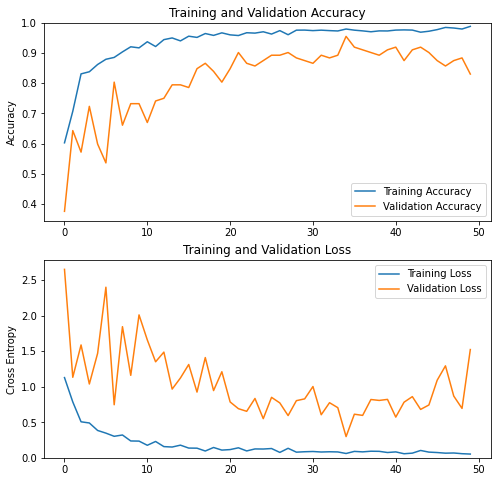

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

(1, 6)
cardboard


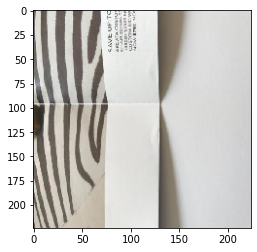

In [0]:
img_path = '/content/gdrive/My Drive/Garbage classification/Garbage classification/paper/paper8.jpg'
img = image.load_img(img_path)
img=np.array(img)/255.0
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img, dtype=np.uint8)
plt.imshow(img.squeeze())
p=model.predict(img[np.newaxis, ...])
print(p.shape)
predicted_class = label[np.argmax(p[0][0], axis=-1)]
print(predicted_class)

In [0]:
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))
# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False


Number of layers in the base model:  155


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [0]:
history_fine = model.fit_generator(train_generator, 
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs, 
                                   workers=4,
                                   validation_data=validation_generator, 
                                   validation_steps=validation_steps)

Epoch 1/50
71/71 [==============================] - 160s 2s/step - loss: 0.0442 - acc: 0.9920 - val_loss: 1.3382 - val_acc: 0.8482
Epoch 2/50
71/71 [==============================] - 154s 2s/step - loss: 0.0295 - acc: 0.9912 - val_loss: 1.2259 - val_acc: 0.8661
Epoch 3/50
71/71 [==============================] - 158s 2s/step - loss: 0.0280 - acc: 0.9903 - val_loss: 1.1707 - val_acc: 0.8571
Epoch 4/50
71/71 [==============================] - 152s 2s/step - loss: 0.0507 - acc: 0.9858 - val_loss: 1.0571 - val_acc: 0.8571
Epoch 5/50
71/71 [==============================] - 156s 2s/step - loss: 0.0194 - acc: 0.9938 - val_loss: 0.9288 - val_acc: 0.8750
Epoch 6/50
71/71 [==============================] - 157s 2s/step - loss: 0.0324 - acc: 0.9894 - val_loss: 0.8621 - val_acc: 0.8750
Epoch 7/50
71/71 [==============================] - 162s 2s/step - loss: 0.0450 - acc: 0.9875 - val_loss: 0.9132 - val_acc: 0.8661
Epoch 8/50
71/71 [==============================] - 167s 2s/step - loss: 0.0220 - a

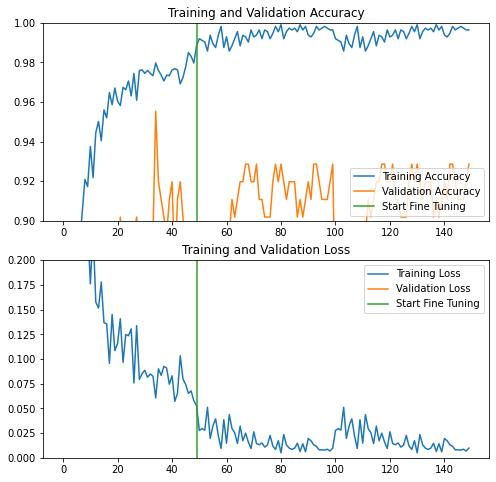

In [0]:
acc += history_fine.history['acc']
val_acc += history_fine.history['val_acc']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.9, 1])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 0.2])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
saved_model_dir = '/content/gdrive/My Drive/'
tf.saved_model.save(model, saved_model_dir)

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                     
drive = GoogleDrive(gauth)

In [0]:
model.save('model.h5')
model_file = drive.CreateFile({'title' : 'model.h5'})                       
model_file.SetContentFile('model.h5')                       
model_file.Upload()

In [0]:
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1t2aHDqarBe0rym4g8YkspdXhy2ZCmtgM'})

In [0]:
file_obj = drive.CreateFile({'id': '1t2aHDqarBe0rym4g8YkspdXhy2ZCmtgM'})                       
file_obj.GetContentFile('keras.h5')

In [0]:
from IPython.display import FileLinks
FileLinks('.')

(1, 6)
3


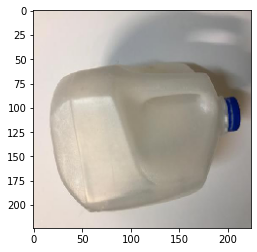

In [0]:
img_path = '/content/gdrive/My Drive/Garbage classification/Garbage classification/plastic/plastic340.jpg'

img=np.array(img)/255.0
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img, dtype=np.uint8)
plt.imshow(img.squeeze())
p=model.predict(img[np.newaxis, ...])
print(p.shape)
predicted_class = np.argmax(p[0], axis=-1)
print(predicted_class)